In [2]:
import os, sys
sys.path.append(os.path.abspath(os.environ['KALE']))
from kale.jupyter import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
#!jt -t chesterish -T -N


from os.path import expanduser
home = expanduser('~')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext autotime



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.31 ms


In [77]:
hom = pd.read_csv(home +
                  '/Google Drive File Stream/Team Drives/Tia_Tummino/Projects/GPCR/CSVs/2019.02.13_GPCR_homology.csv')


time: 8.13 ms


In [78]:
categories = ['A', 'C', 'X']
colors = ['plum', 'turquoise', 'mediumseagreen']
color_dict = dict(zip(categories, colors))
hom["Color_protein"] = hom['Class'].apply(lambda x: color_dict[x])


categories = ['A', 'C', 'X']
colors = ['darkmagenta', 'teal', 'forestgreen']
color_dict = dict(zip(categories, colors))
hom["Color_dna"] = hom['Class'].apply(lambda x: color_dict[x])
#hom['Class ']

time: 5.82 ms


In [79]:
hom.sort_values(by = 'Class', inplace = True)



time: 3.01 ms


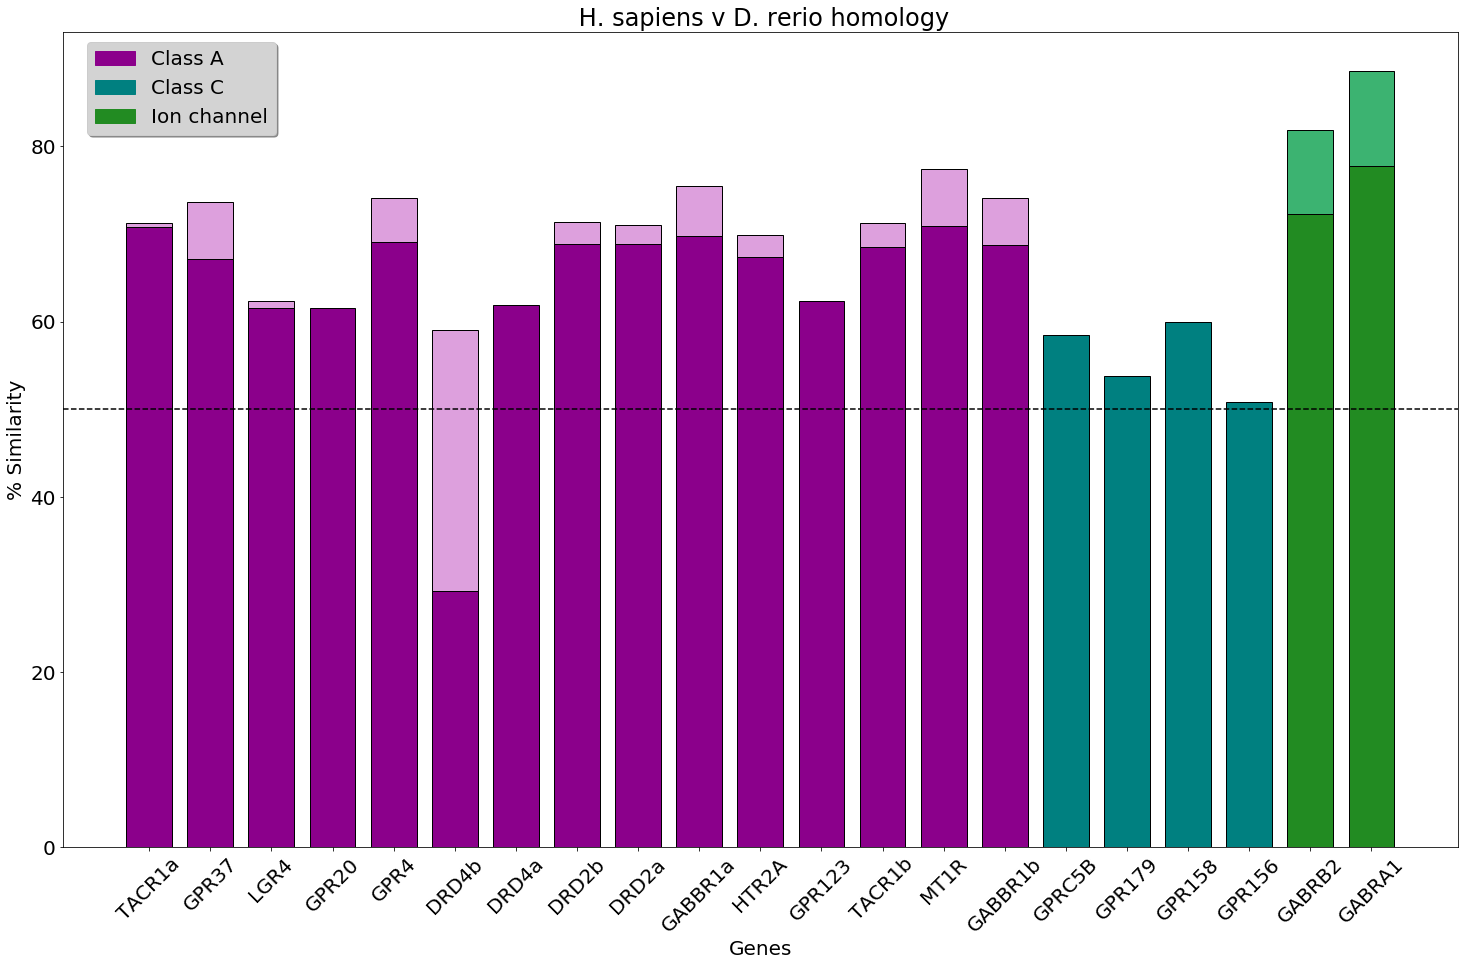

time: 1.06 s


In [81]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

plt.figure(figsize=(25, 15))


protein = plt.bar(x = hom['Receptor'], height = hom['Protein homology'], width = 0.75, 
                  edgecolor = 'black', color = hom['Color_protein'], align = 'center')

dna = plt.bar(x = hom['Receptor'], height = hom['DNA homology '], width = 0.75, 
              color=hom['Color_dna'], edgecolor = 'black')


plt.xlabel('Genes')
plt.ylabel('% Similarity')
plt.xticks(rotation = 45)



plum = mpatches.Patch(color='darkmagenta', label='Class A')
blue = mpatches.Patch(color='teal', label='Class C')
green = mpatches.Patch(color='forestgreen', label='Ion channel')



plt.legend(handles=[plum,blue,green ], loc='upper right', bbox_to_anchor=(.16, 1),
          fancybox=True, shadow=True, ncol=1, facecolor = 'lightgray')


plt.axhline(50,linestyle = '--', color = 'black')
plt.title(' H. sapiens v D. rerio homology')
plt.show()